In [14]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import json
%matplotlib inline

In [15]:
positions = json.load(open('posns.json'))


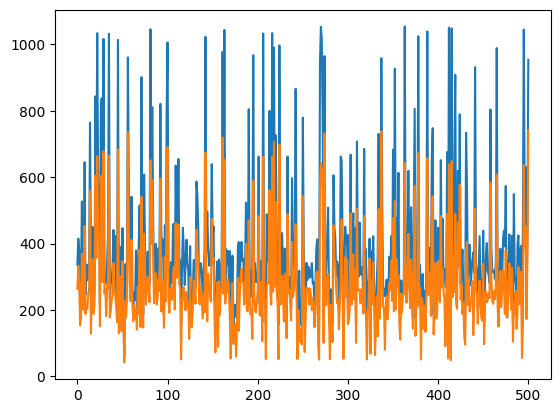

In [16]:
xs = [p['x'] for p in positions]
rhxs = [p['x'] + p['width'] for p in positions]
plt.plot(rhxs)

plt.plot(xs)

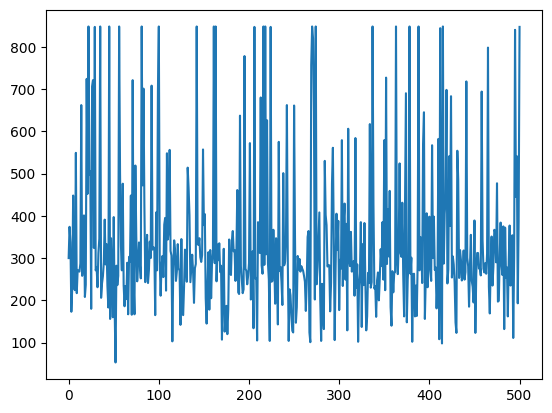

In [17]:
cms = [(2 * p['x'] + p['width']) / 2 for p in positions]
plt.plot(cms)

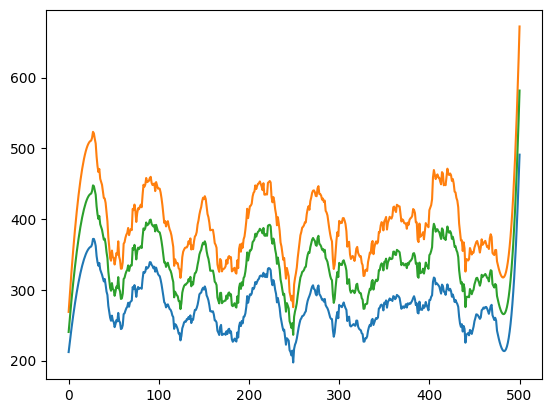

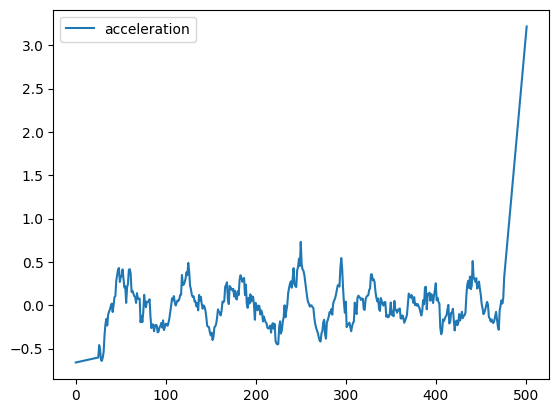

In [32]:


def smooth_skier_position(position_data, method='savgol', **kwargs):
    if method == 'savgol':
        window = kwargs.get('window', 51)
        order = kwargs.get('order', 3)
        return savgol_filter(position_data, window, order)

window = 51 
order = 3
plt.plot(smooth_skier_position(xs, window=window, order=order))
plt.plot(smooth_skier_position(rhxs, window=window, order=order))
plt.plot(smooth_skier_position(cms, window=window, order=order))

plt.show()

velocity = savgol_filter([0] + [p['x'] for p in positions], window, order, deriv=1)
acceleration = savgol_filter([0] + [p['x'] for p in positions], window, order, deriv=2)
# plt.plot(xs)
# plt.plot(velocity, label='velocity')
plt.plot(acceleration, label='acceleration')
plt.legend()
plt.show()